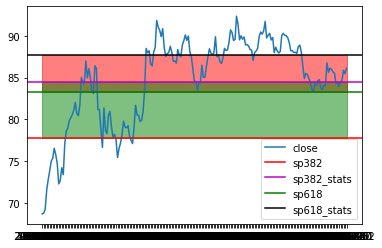

In [3]:
import tushare as ts
import datetime
import time
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

endTime = datetime.datetime.now()
endTimeStr = endTime.strftime("%Y-%m-%d") 
startTime = (endTime - datetime.timedelta(days = 300)) 
startTimeStr = startTime.strftime("%Y-%m-%d")
data = ts.get_hist_data('601318', start=startTimeStr,end=endTimeStr)
data = data.iloc[::-1]

cs_max = data.close.max();
cs_min = data.close.min();
sp382 = (cs_max - cs_min) * 0.382 + cs_min;
sp618 = (cs_max - cs_min) * 0.618 + cs_min;
sp382_stats = stats.scoreatpercentile(data.close, 38.2)
sp618_stats = stats.scoreatpercentile(data.close, 61.8)

above618 = np.maximum(sp618, sp618_stats)
below618 = np.minimum(sp618, sp618_stats)
above382 = np.maximum(sp382, sp382_stats)
below382 = np.minimum(sp382, sp382_stats)

plt.plot(data.close);
plt.axhline(sp382, c='r')
plt.axhline(sp382_stats, c='m')
plt.axhline(sp618, c='g')
plt.axhline(sp618_stats, c='k')
plt.fill_between(data.index, above618, below618, alpha=0.5, color='r')
plt.fill_between(data.index, above382, below382, alpha=0.5, color='g')

plt.legend(['close', 'sp382', 'sp382_stats', 'sp618', 'sp618_stats'], loc='best')